# **ELTONJOHN OKETCH WEEK 9 PROJECT 2 (CORE) REGRESSION IP, WEEK 4(MODULE 2)**

- This week's project requires me to implement a K-nearest neighbor (kNN) classifier and a Naive Bayes classifier. Once I conduct the experiments, I will calculate the resulting metric

# **1.) Research Question**

## **a.) Defining the question**

- For the second dataset,The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

- Which model Split will best predict whether an email is a spam or not using Naive-Bayes classifier?

## **b.) Understanding the context**

- The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography.The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.


## **c.) Defining metric for success**

- I am going to use the Naive-Bayes Classifier algorithm to create a model that shows the likelihood of an email being a spam or not. Then I will optimise the model to its best and say that I succeeded when I have an accuracy of between (70% - 95%). Less than that will probably indicate that the model is underfitting while more than that range will mean that the model is overfitting.

## **d.) Recording the experimental design**

- Randomly partition each dataset into two parts i.e 80 - 20 sets. For dataset 1, because I don't have the label for the test set, I will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

- I shall compute the accuracy (percentage of correct classification). Report the confusion matrix of each classifier.

- I shall Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling. Suggest and apply at least one of the optimization techniques that I learned earlier this week.

- Provide further recommendations to improve both classifiers.

# **2.) Dataset Loading and Preview**

**Importing Libraries**

In [31]:
#Reading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload

**Loading the Dataset**

In [32]:
#load the datasets 
df = pd.read_csv('/content/spambase.data', header=None)
# previewing the top of the dataset
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


# **3.) Checking the Data**

In [33]:
# Preview the top of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [34]:
# Preview the bottom of the dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [35]:
#Checking for the shape of the dataframe
print('The dataset has'+ str (df.columns.shape)+'columns and' +str (df.index.shape) +'rows')

The dataset has(58,)columns and(4601,)rows


In [36]:
#Checking for data types
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55      int64
56      int64
57      int64
dtype: object

In [37]:
# Printing the the number of unique values of the columns
print(df.nunique())

0      142
1      171
2      214
3       43
4      255
5      141
6      173
7      170
8      144
9      245
10     113
11     316
12     158
13     133
14     118
15     253
16     197
17     229
18     575
19     148
20     401
21      99
22     164
23     143
24     395
25     281
26     240
27     200
28     156
29     179
30     128
31     106
32     184
33     110
34     177
35     159
36     188
37      53
38     163
39     125
40     108
41     186
42     136
43     160
44     230
45     227
46      38
47     106
48     313
49     641
50     225
51     964
52     504
53     316
54    2161
55     271
56     919
57       2
dtype: int64


In [38]:
#Viewing the column names in the dataset
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [39]:
# Checking the summary statistics of the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# **4.) External Data Source Validation**

- (https://archive.ics.uci.edu/ml/datasets/Spambase) from the Link I can confirm that this dataset does reflect the actual features needed to determine whether an email is a spam or not.

# **5.) Tidying the Dataset**

In [40]:
# Previewing the dataset
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


**Checking for missing Values**

In [41]:
#Checking for missing values
df.isnull().any()
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

- There are no missing values in this dataset.

**Checking for duplicated Values**

In [42]:
#checking if the dataset has duplicated values. If present, duplicates will be dropped
df.duplicated().sum()

391

In [43]:
# Visualize the duplicated values
data = df[df.duplicated()]
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


- Indeed these are duplicated values and should be dropped.

In [44]:
# Drop duplicates
df = df.drop_duplicates()
# checking count of duplicate entries
df.duplicated().sum()

0

- I have now dropped all the duplicated values from the dataset.

In [45]:
#Checkig the shape of data after tidying it up 
df.shape

(4210, 58)

**checking for anomalies**

In [46]:
# checking for anomalies

q11 = df[1].quantile(.25)
q31 = df[1].quantile(.75)

iqr11 = q31 - q11
iqr11
##
q11, q31 = np.percentile(df[1], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

# there are no anomalies in the data

0.0 0.0


- There are no anomalies inn the dataset below.

# **6.) Exploratory Data Analysis**

## **a) Univariate Analysis**

In [47]:
# Frequency distribution of feature in dataset
for var in df.columns:
    print(df[var].value_counts())

0.00    3228
0.10      40
0.09      35
0.17      34
0.08      31
        ... 
1.36       1
2.35       1
1.01       1
2.12       1
0.88       1
Name: 0, Length: 142, dtype: int64
0.00    3399
0.19      24
0.08      24
0.10      23
0.17      22
        ... 
4.76       1
1.05       1
1.65       1
3.05       1
2.01       1
Name: 1, Length: 171, dtype: int64
0.00    2426
0.32      44
0.29      37
0.55      36
0.36      28
        ... 
2.25       1
2.91       1
1.79       1
1.43       1
2.35       1
Name: 2, Length: 214, dtype: int64
0.00     4164
0.58        2
0.42        2
0.17        2
0.21        2
0.60        1
0.44        1
7.07        1
1.33        1
1.29        1
19.73       1
0.57        1
0.04        1
35.46       1
1.35        1
0.11        1
0.14        1
0.15        1
0.87        1
0.13        1
0.55        1
42.73       1
19.16       1
0.06        1
0.52        1
0.16        1
0.19        1
0.95        1
5.03        1
7.18        1
13.63       1
0.81        1
1.16        1
1.26

In [48]:
df.columns


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


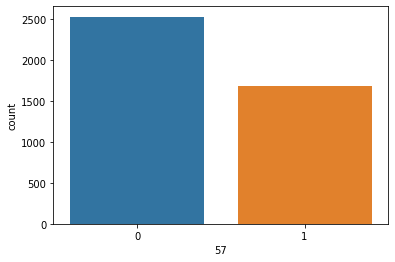

In [49]:
# A count plot for emails that are spams or not
sns.countplot(df[57])

In [50]:
# describing the statistical features of the data( summary statistics)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


- Since our dataset has already been analyzed and also because it has unlabelled columns, we will move directly into modelling.

## **b.) Multivarite Analysis**

In [93]:
# We could use the LDA method to assess the predictor and the dependent variables
# import LDA method from sklearn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Then the following code divides data into training and test sets
#(THE DIVISION OF THE PRECTICTOR AND DEPENDENT VARIABLE HAPPENS BELOW, SO RUN THIS
# CELL AFTER RUNNING THE DECISON TREES CELL WHERE THE SPLIT AND ENCODING OCCURS) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[675  62]
 [ 45 481]]
Accuracy0.9152810768012668


- LDA achieves an accuracy of 92%.

# **7.)Implementing the Solution**

## **a.) Naive Bayes Classifier**

- This week's project requires us to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier as the second project. Once we conduct the experiments, we will calculate the resulting metrics:

**Procedure**

- Randomly partition each dataset into two parts i.e 80 - 20  sets.
For dataset 1, because I don't have the label for the test set, I will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

- I shall compute the accuracy (percentage of correct classification).
Report the confusion matrix of each classifier.

- I shall Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
Suggest and apply at least one of the optimization techniques that I learned earlier this week.

- Provide further recommendations to improve both classifiers

In [51]:
# importing the library we'll use for naive bayes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [52]:
# Separating our target variable from the other features in the dataset
X = df.iloc[:, :57].values
y = df.iloc[:, 57].values

## **b.) Using the 80-20 Split**

In [53]:
# Dividing the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [63]:
# Standardising the data to the same scale
# Feature scaling
X = StandardScaler().fit_transform(X)
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# check the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3368, 57)
(3368,)
(842, 57)
(842,)


In [67]:
# Training and Making Predictions
from sklearn.naive_bayes import MultinomialNB
# instantiating the model
model = MultinomialNB()
# fitting the model to the training set
model.fit(X_train, y_train)
# Predicting the Test set results
# 
y_pred = model.predict(X_test)

In [68]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       1          1
4       0          0


,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.353919
std,0.492508,0.478469
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [69]:
# Evaluating the 80-20 split model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8871733966745843
[[472  23]
 [ 72 275]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       495
           1       0.92      0.79      0.85       347

    accuracy                           0.89       842
   macro avg       0.90      0.87      0.88       842
weighted avg       0.89      0.89      0.89       842



- The accuracy of this 80-20 model split is 88.7%



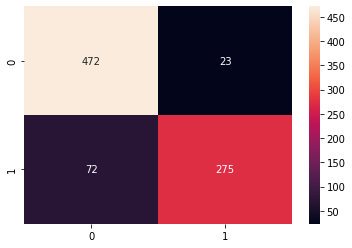

In [70]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

## **c.) Using the 70-30 Split**

In [71]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
# Standardising the data to the same scale
# Feature scaling
X = StandardScaler().fit_transform(X)
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# check the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2947, 57)
(2947,)
(1263, 57)
(1263,)


In [74]:
# Training and Making Predictions
from sklearn.naive_bayes import MultinomialNB
# instantiating the model
model = MultinomialNB()
# fitting the model to the training set
model.fit(X_train, y_train)
# Predicting the Test set results
# 
y_pred = model.predict(X_test)

In [75]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       1          1
4       0          0


,Actual,Predicted
count,1263.000000,1263.00000
mean,0.416469,0.35867
std,0.493168,0.47980
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,1.00000
max,1.000000,1.00000


In [76]:
# Evaluating the 80-20 split model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8915281076801267
[[705  32]
 [105 421]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       737
           1       0.93      0.80      0.86       526

    accuracy                           0.89      1263
   macro avg       0.90      0.88      0.89      1263
weighted avg       0.89      0.89      0.89      1263



- The accuracy of this 70-30 model split is 89.1% more closer to 90% than 80-20 model

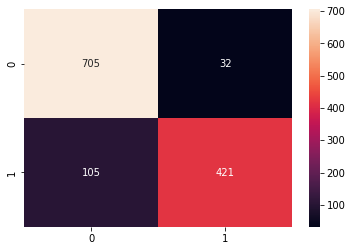

In [77]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

## d.) **Using the 60-40 Split**

In [78]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [79]:
# Standardising the data to the same scale
# Feature scaling
X = StandardScaler().fit_transform(X)
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# check the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2526, 57)
(2526,)
(1684, 57)
(1684,)


In [87]:
# Training and Making Predictions
from sklearn.naive_bayes import MultinomialNB
# instantiating the model
model = MultinomialNB()
# fitting the model to the training set
model.fit(X_train, y_train)
# Predicting the Test set results
# 
y_pred = model.predict(X_test)

In [82]:
#We compare the results of the predicted with the actual results in the y-test data
compare_df= pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare_df.head())
compare_df.describe()

   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       1          1
4       0          0


,Actual,Predicted
count,1684.000000,1684.000000
mean,0.409739,0.355701
std,0.491932,0.478867
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [83]:
# Evaluating the 80-20 split model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8948931116389549
[[951  43]
 [134 556]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       994
           1       0.93      0.81      0.86       690

    accuracy                           0.89      1684
   macro avg       0.90      0.88      0.89      1684
weighted avg       0.90      0.89      0.89      1684



- The accuracy of this 60-40 split model is 89.5% more accurate than 80-20 and 70-30 split models.

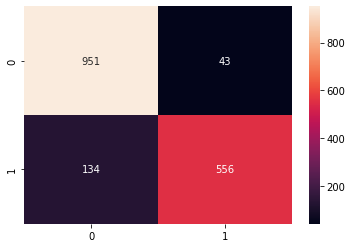

In [84]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

# **8.) Different Model Prediction Outputs**

In [90]:
# Models vs accuracy score.
models = ['80-20 split', '70-30 split', '60-40 split']
accuracy_scores = [88.7,89.1,89.5]
model_results = pd.DataFrame({'Models': models, 'Accuracy_scores %': accuracy_scores})
model_results.sort_values(by = 'Accuracy_scores %',axis=0,ascending=False)

,Models,Accuracy_scores %
2,60-40 split,89.5
1,70-30 split,89.1
0,80-20 split,88.7


- The model split that performed the best in terms of accuracy scores was the 60-40 split model.

# **9.) Challenging The Solution**

**a.) Gradient boost**

In [91]:
# Let's start with Gradient boosted classifier
# We use decision trees when performing gradient boosting 
# We will start by setting different learning rates and comparing the performance of the classifier 
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb_clf.score(X_train, y_train))
    print("Accuracy score (validation):", gb_clf.score(X_test, y_test))
    print("                                                                                    ")
    print("*********************************************************************************")

Learning rate:  0.05
Accuracy score (training): 0.9105304829770388
Accuracy score (validation): 0.9204275534441805
                                                                                    
*********************************************************************************
Learning rate:  0.075
Accuracy score (training): 0.9251781472684085
Accuracy score (validation): 0.934085510688836
                                                                                    
*********************************************************************************
Learning rate:  0.1
Accuracy score (training): 0.934283452098179
Accuracy score (validation): 0.9370546318289786
                                                                                    
*********************************************************************************
Learning rate:  0.25
Accuracy score (training): 0.9584323040380047
Accuracy score (validation): 0.9453681710213777
                                         

- I will chose the learning rate with the highest accuracy score that is 1 with 98% accuracy

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import cross_val_score

# Fit the model with our new hyperparameter
grboost=GradientBoostingClassifier(n_estimators=300,learning_rate=1)
grboost.fit(X_train,y_train)
y_predb=grboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracyb=metrics.accuracy_score(y_test,y_predb)
print('The accuracy of the model is',str(accuracyb *100),'%')

The accuracy of the model is 93.11163895486936 %


- Using the gradient boost we can observe that the accuracy of the gradient boost model improves to 93% and that is much better than our accuracy from the Naive bayes classifier, that means that Naive bayes is prolly not the best method to model this dataset. It is fast but less accurate.

# **10.) Recommendation and Conclusison**

- The model that performed the best was the 60-40 split model with an accuracy of 89.5% this was accomplished.

This model can be improved by using optimal parameters to optimize the model and achieve great results.

# **11.) Follow up questions**

- All the questions I had defined have been answered using the availed data. Therefore there is no need of further data to answer the defined questions

## **a). Did we have the right data**?

- Yes we did have the right data to fully come up with models that make the predictions as required.

## **b). Do we need other data to answer our question?**

- No, we require no additional data as all the questions have been answered and the necessary predictions have been made.

## **c). Did we have the right question?**

- Yes we did, the questions defined led to a very thourough yet vigourous exercise of making prediction using various Naive Bayes classifier modelling splits.The accuracy of each model split was measured and accounted for to pick forth the best model.